Titanic Survival Prediction

Dataset used : Titanic Dataset

Link to the dataset : https://www.kaggle.com/c/titanic

Model Used : Logistic Regression

Importing the Dependencies

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection & Processing

In [232]:
# load the data from csv file to Pandas DataFrame
titanic_data = sns.load_dataset("titanic")
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [233]:
# printing the first 5 rows of the dataframe
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [234]:
# number of rows and Columns
titanic_data.shape

(891, 15)

In [235]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [236]:
# check the number of missing values in each column
titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Handling the Missing values

In [237]:
# drop the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns=['class','who','adult_male','deck','embark_town','alive','alone'], axis=1)

In [238]:
# replacing the missing values in "Age" column with mean value
titanic_data['age'].fillna(titanic_data['age'].mean(), inplace=True)

C:\Users\shiva\AppData\Local\Temp\ipykernel_13668\1147638818.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['age'].fillna(titanic_data['age'].mean(), inplace=True)


In [239]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [240]:
# finding the mode value of "Embarked" column
print(titanic_data['embarked'].mode())

0    S
Name: embarked, dtype: object


In [241]:
print(titanic_data['embarked'].mode()[0])

S


In [242]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)

C:\Users\shiva\AppData\Local\Temp\ipykernel_13668\83151213.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)


In [243]:
# check the number of missing values in each column
titanic_data.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

Data Analysis

In [244]:
# getting some statistical measures about the data
titanic_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [245]:
# label encoging sex column as 0 for male and 1 for female
titanic_data['sex'].replace('male', 0, inplace=True)
titanic_data['sex'].replace('female', 1, inplace=True)

C:\Users\shiva\AppData\Local\Temp\ipykernel_13668\3281324531.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['sex'].replace('male', 0, inplace=True)
C:\Users\shiva\AppData\Local\Temp\ipykernel_13668\3281324531.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [246]:
# finding the number of people survived and not survived
titanic_data['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

Data Visualization

In [247]:
sns.set()

In [248]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


<Axes: xlabel='survived', ylabel='count'>

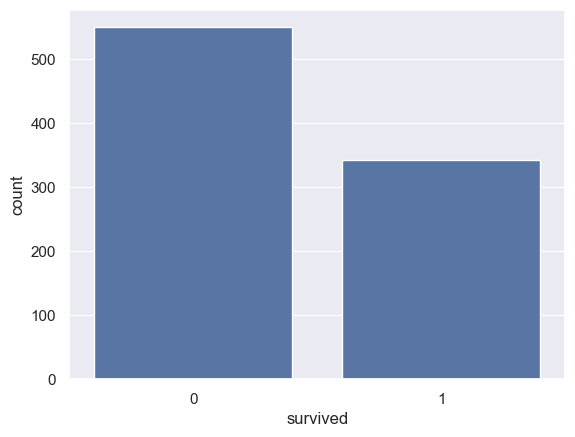

In [249]:
# making a count plot for "Survived" column
sns.countplot(x = 'survived', data=titanic_data)

In [250]:
titanic_data['sex'].value_counts()

sex
0    577
1    314
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

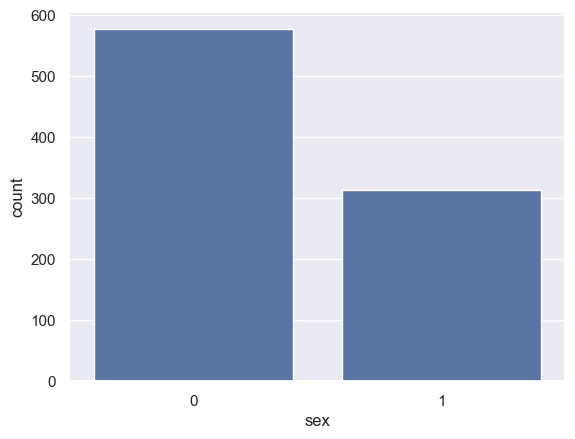

In [251]:
# making a count plot for "Sex" column
sns.countplot(x = 'sex', data=titanic_data)

<Axes: xlabel='sex', ylabel='count'>

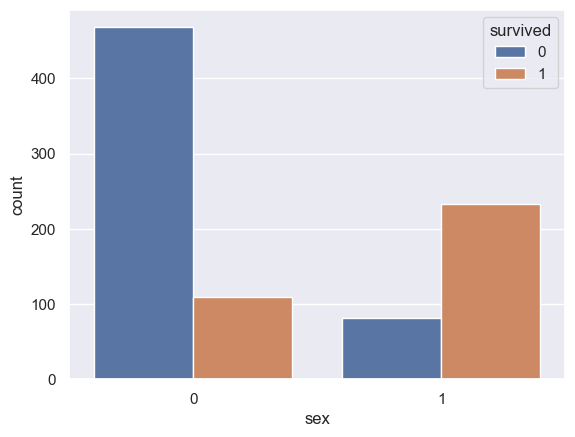

In [252]:
# number of survivors Gender wise
sns.countplot(x = 'sex', hue='survived', data=titanic_data)

<Axes: xlabel='pclass', ylabel='count'>

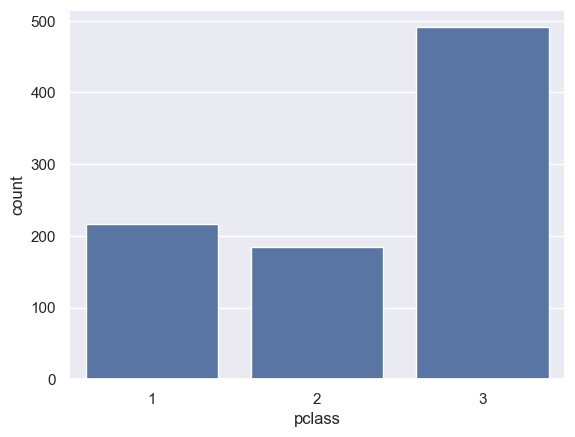

In [253]:
# making a count plot for "Pclass" column
sns.countplot(x = 'pclass', data=titanic_data)

<Axes: xlabel='pclass', ylabel='count'>

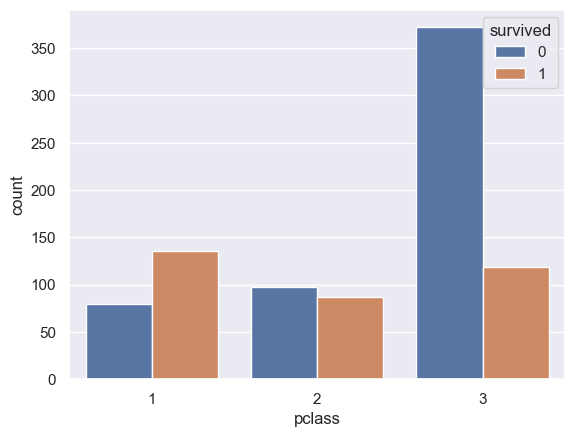

In [254]:
sns.countplot(x = 'pclass', hue='survived', data=titanic_data)

Encoding the Categorical Columns

In [255]:
titanic_data['sex'].value_counts()

sex
0    577
1    314
Name: count, dtype: int64

In [256]:
titanic_data['embarked'].value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [257]:
# converting categorical Columns
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [258]:
titanic_data = titanic_data.drop(['embarked'], axis=1)

In [259]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


Separating features & Target

In [260]:
X = titanic_data.drop(columns = ['survived'],axis=1)
Y = titanic_data['survived']

In [261]:
print(X)

     pclass  sex        age  sibsp  parch     fare
0         3    0  22.000000      1      0   7.2500
1         1    1  38.000000      1      0  71.2833
2         3    1  26.000000      0      0   7.9250
3         1    1  35.000000      1      0  53.1000
4         3    0  35.000000      0      0   8.0500
..      ...  ...        ...    ...    ...      ...
886       2    0  27.000000      0      0  13.0000
887       1    1  19.000000      0      0  30.0000
888       3    1  29.699118      1      2  23.4500
889       1    0  26.000000      0      0  30.0000
890       3    0  32.000000      0      0   7.7500

[891 rows x 6 columns]


In [262]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64


Splitting the data into training data & Test data

In [263]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [264]:
print(X.shape, X_train.shape, X_test.shape)

(891, 6) (712, 6) (179, 6)


Model Training

Logistic Regression

In [265]:
model = LogisticRegression()

In [266]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Model Evaluation

Accuracy Score

In [267]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [268]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 

In [269]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8146067415730337


In [270]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [271]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1]


In [272]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.776536312849162
